In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer


# list_of_lists = []

# with open('data') as f:
#     for line in f:
#         inner_list = [line.strip() for line in line.split('\t')]
#         list_of_lists.append(inner_list)

# data = pd.DataFrame(list_of_lists)
# data['headline_text']=data[0]
# data=data.iloc[:,-1]
# data.to_csv('data2.csv')
# print(data.head())
# print(df.info())



In [2]:
data=pd.read_csv('data2.csv')
print(data.head())
print(data.columns)
print(data.info())

                                       headline_text
0  Apparent magnitude  is a measure of the bright...
1  Alpha Centauri is the closest star system and ...
2  American Airlines , Inc . is a major American ...
3  Active Directory is a directory service develo...
4  Antares  , designated α Scorpii , is on averag...
Index(['headline_text'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   headline_text  5611 non-null   object
dtypes: object(1)
memory usage: 44.0+ KB
None


In [3]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(8)

,headline_text


In [4]:
data = data.drop_duplicates('headline_text')

In [5]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_word = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['headline_text'].values


In [6]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\b(?!nbsp\b)\w+[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [7]:
vectorizer = TfidfVectorizer(stop_words = stop_word, tokenizer = tokenize, max_features = 400)
x = vectorizer.fit_transform(desc).todense()
print(x)
words = vectorizer.get_feature_names()
print(len(words))
print(words)


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.08877759 0.        ]
 [0.         0.         0.         ... 0.14131583 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.02505085 0.        ]
 [0.         0.         0.         ... 0.         0.05471803 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
400
['abov', 'access', 'accord', 'act', 'activ', 'ad', 'addit', 'administr', 'age', 'agricultur', 'air', 'aircraft', 'airlin', 'airport', 'album', 'allow', 'american', 'ani', 'announc', 'annual', 'anoth', 'appar', 'appear', 'applic', 'approxim', 'april', 'area', 'armi', 'artist', 'associ', 'author', 'avail', 'averag', 'aviat', 'away', 'band', 'bank', 'base', 'basin', 'bay', 'becam', 'becaus', 'becom', 'befor', 'began', 'best', 'billion', 'binari', 'black', 'blue', 'boat', 'border', 'bright', 'british', 'build', 'built', 'busi', 'busiest', 'camp', 'ca

In [8]:
# no_topics=5611
# nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(x)

# def display_topics(model, feature_names, no_top_words):
#     for topic_idx, topic in enumerate(model.components_):
#         print "Topic %d:" % (topic_idx)
#         print " ".join([feature_names[i]
#                         for i in topic.argsort()[:-no_top_words - 1:-1]])

# no_top_words = 10
# display_topics(nmf, words, no_top_words)

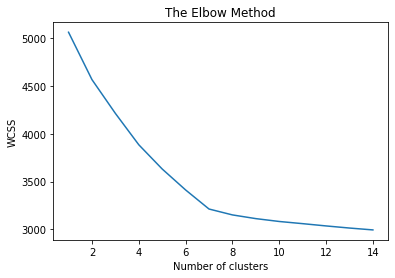

In [9]:
from sklearn.cluster import KMeans
wcss = []
max_=15
for i in range(1,max_):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42,n_jobs=3)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,max_),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [10]:
num_clusters=7
kmeans = KMeans(n_clusters = num_clusters, n_init = 10, n_jobs = 3,max_iter=300,random_state=42).fit(x) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)


# # We look at 7 the clusters generated by k-means.
# common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
# for num, centroid in enumerate(common_words):
#     print('Cluster ',str(num) + ' : ' + ', '.join(words[word] for word in centroid))

In [11]:
print("Top 10 terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    top_ten_words = [words[ind] for ind in order_centroids[i, :10]]
    print("Cluster {}: {}".format(i, ', '.join(top_ten_words)))

Top 10 terms per cluster:
Cluster 0: star, sun, magnitud, time, mass, year, constel, veloc, type, orbit
Cluster 1: lake, water, dam, river, area, reservoir, fish, park, north, shore
Cluster 2: fort, built, site, war, armi, dure, river, histor, post, militari
Cluster 3: record, label, releas, music, album, artist, band, produc, includ, group
Cluster 4: airport, intern, air, airlin, flight, passeng, aviat, oper, aircraft, servic
Cluster 5: municip, popul, town, area, villag, km, state, citi, region, locat
Cluster 6: window, microsoft, version, file, softwar, use, support, applic, user, develop


In [12]:
# y_kmeans = kmeans.predict(x)
# print(y_kmeans)
# data['clusters']=y_kmeans
# data.head()

labels = kmeans.labels_ 
data['label'] = labels
with open('cluster.txt','w')as f:
    f.write(data['label'].to_string(header = False, index = False))

In [13]:
# from sklearn.metrics import silhouette_score
# silhouette_score(x, y_kmeans)

In [14]:
data.head(10)

,headline_text,label
0,Apparent magnitude is a measure of the bright...,0
1,Alpha Centauri is the closest star system and ...,0
2,"American Airlines , Inc . is a major American ...",2
3,Active Directory is a directory service develo...,6
4,"Antares , designated α Scorpii , is on averag...",0
5,"Altair , designation α&nbsp ;Aquilae , is the...",0
6,Barnards Star is a red dwarf about 6 light-ye...,0
7,BeOS is an operating system for personal compu...,6
8,Canis Major is a constellation in the souther...,0
9,Canis Minor is a small constellation in the n...,0


In [16]:
dist = 1 - cosine_similarity(x)
dist

array([[ 0.00000000e+00,  7.60584060e-01,  9.83377068e-01, ...,
         9.90841087e-01,  1.00000000e+00,  9.84803301e-01],
       [ 7.60584060e-01,  0.00000000e+00,  9.91893382e-01, ...,
         9.93076098e-01,  9.95142265e-01,  9.87701285e-01],
       [ 9.83377068e-01,  9.91893382e-01,  2.22044605e-16, ...,
         9.44842619e-01,  9.06363768e-01,  9.92819510e-01],
       ...,
       [ 9.90841087e-01,  9.93076098e-01,  9.44842619e-01, ...,
         2.22044605e-16,  9.11833781e-01,  3.93935165e-01],
       [ 1.00000000e+00,  9.95142265e-01,  9.06363768e-01, ...,
         9.11833781e-01,  0.00000000e+00,  9.83871833e-01],
       [ 9.84803301e-01,  9.87701285e-01,  9.92819510e-01, ...,
         3.93935165e-01,  9.83871833e-01, -2.22044605e-16]])